# Logistic Regression - Multiclass Classification
Logistic regression assumes that the class attribute has only two values (e.g., good/bad, 1/0, 1/-1). When facing a problem with more class values, there are two options for applying a two value classifier. One can build one classifier for each class value and train it against all the other classes. Otherwise, one can minimize the loss using on the multinomial loss fit across the entire probability distribution.

In this example, we apply logistic regression using the <b>one versus the rest</b> evaluation using a well-known dataset called <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris</a>

First we load all the needed libraries.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn import model_selection, metrics
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Next, we load the dataset that is included in the Scikit-Learn dataset module.

In [9]:
# import some data to play with
iris = datasets.load_iris()
target = np.array(iris.target)

# Analyzing dataset structure
instance_count, attr_count = iris.data.shape
print('Number of instances: %d' % instance_count)
print('Number of attributes: %d' % attr_count)
print('Column names: %s' %  ', '.join(iris.feature_names))

Number of instances: 150
Number of attributes: 4
Column names: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)


We will use only the first two variables (sepal length and sepal width)

In [10]:
x = iris.data[:, :2]
y = iris.target

In [11]:
# Split train/test
train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size=0.33, random_state=42)

And build a logistic regression model without regularization (thus, $\alpha=0$ which means that C must be very large) and using <b>one versus rest</b> for multiclass classification (this is the default option so <b>multi_class='ovr'</b> can be avoided.

In [17]:
logistic = linear_model.LogisticRegression(C=10e10, multi_class='ovr',random_state=1234)
logistic.fit(train_x,train_y)

yp = logistic.predict(test_x)

print ("Average accuracy = %3.2f" % metrics.accuracy_score(y_pred=yp, y_true=test_y) )

Average accuracy = 0.82


Let's plot the decision boundaries. First we compute the boundaries for the two input variables (x0_min & x0_max; x1_min & x1_max). Next we build a grid and compute the classification for each position so as to paint the regions according to an assigned class.

In [18]:
x0_min, x0_max = x[:, 0].min() - .5, x[:, 0].max() + .5
x1_min, x1_max = x[:, 1].min() - .5, x[:, 1].max() + .5

h = .01
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

z = logistic.predict(np.c_[xx0.ravel(), xx1.ravel()])

Now let's plot the points and the boundaries.

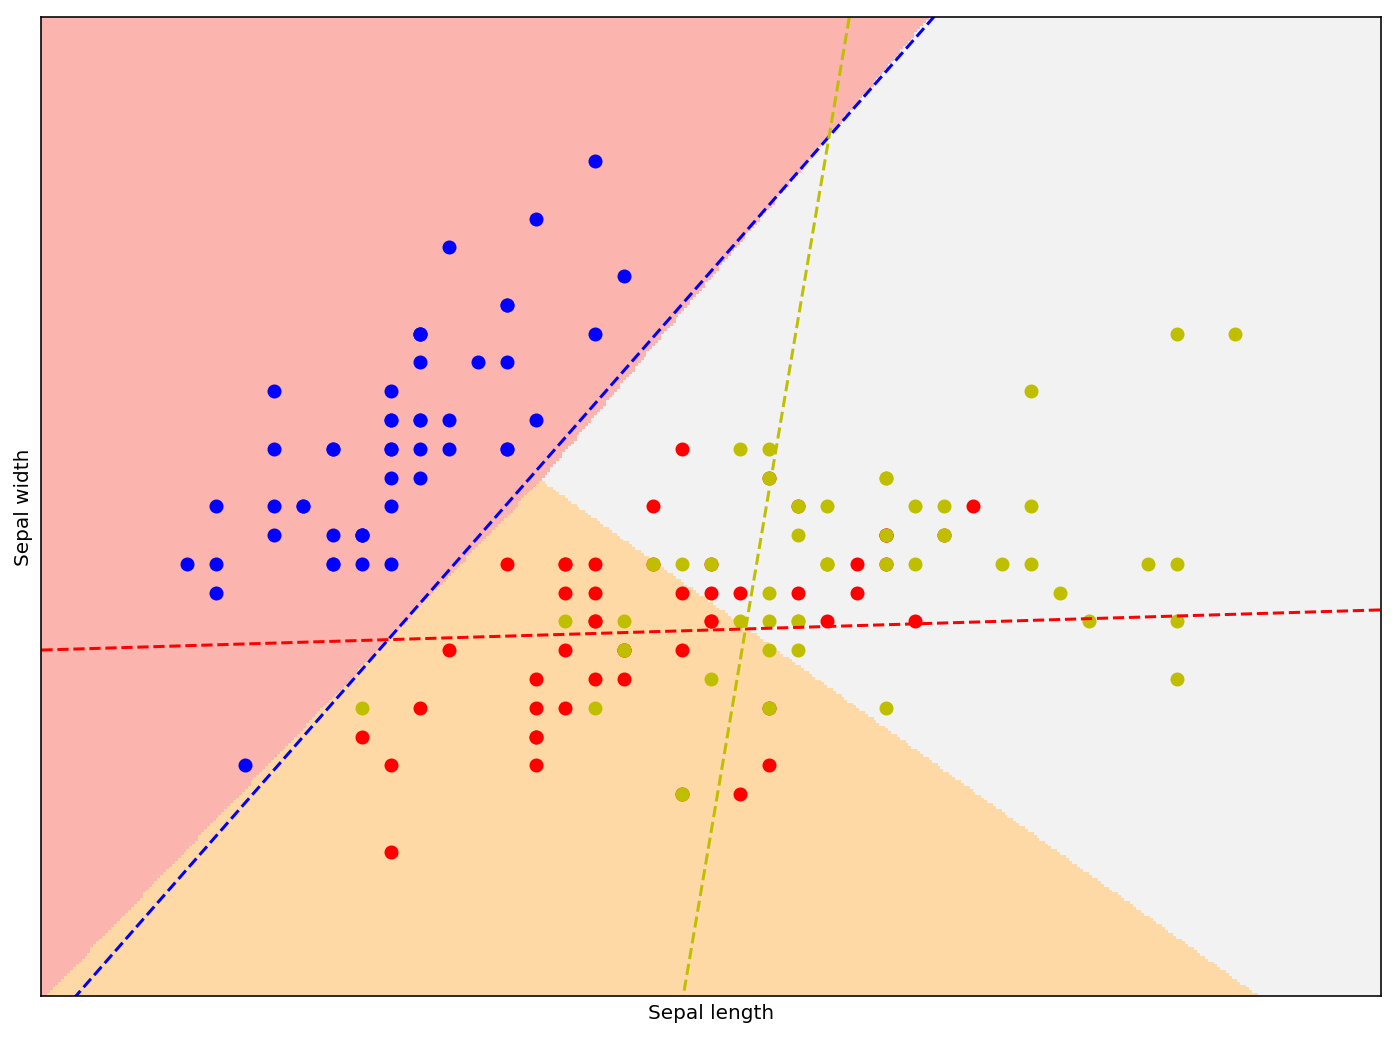

In [19]:
z = z.reshape(xx0.shape)
plt.figure(1, figsize=(12, 9))
plt.pcolormesh(xx0, xx1, z, cmap=plt.cm.Pastel1)

# Plot also the training points
colors = "bry"
for i, color in zip(logistic.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color) #, cmap=plt.cm.Pastel2)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx0.min(), xx0.max())
plt.ylim(xx1.min(), xx1.max())
plt.xticks(())
plt.yticks(())


### plot also the planes
coef = logistic.coef_
intercept = logistic.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([x0_min, x0_max], [line(x0_min), line(x0_max)],
             ls="--", color=color)

colors = "bry"
for i, color in zip(logistic.classes_, colors):
    plot_hyperplane(i, color)

plt.show()

## Multinomial approach.

In [21]:
logistic_mn = linear_model.LogisticRegression(C=10e10, solver='sag', multi_class='multinomial', random_state=1234, max_iter=10000)
logistic_mn.fit(train_x,train_y)

yp = logistic_mn.predict(test_x)
print ("Average accuracy = %3.2f" %  metrics.accuracy_score(y_pred=yp, y_true=test_y) )

Average accuracy = 0.80


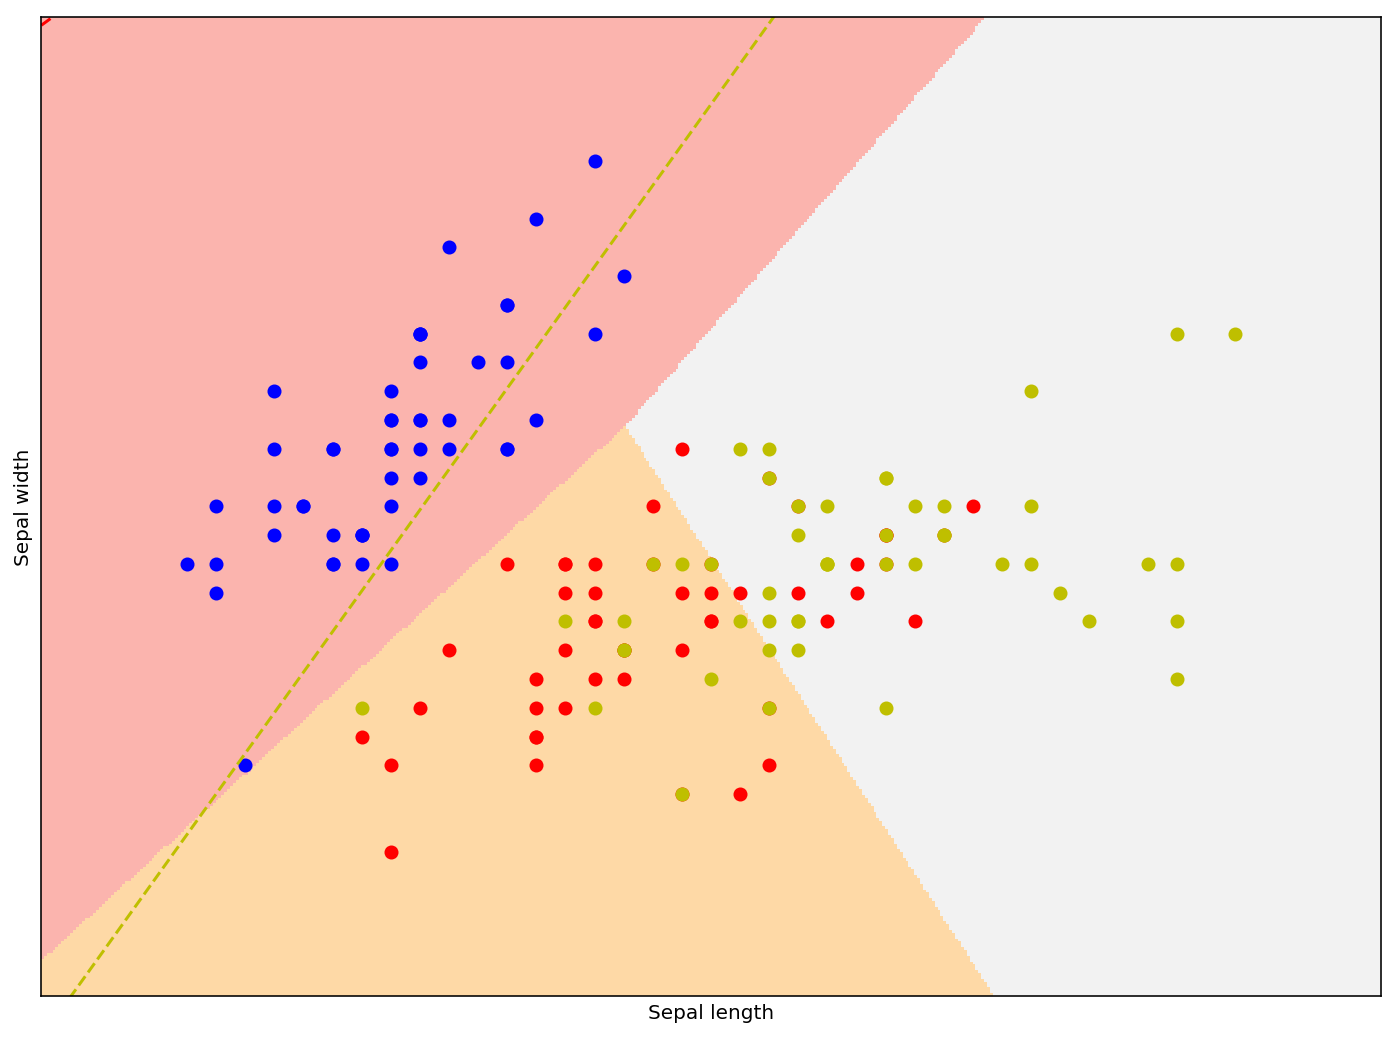

In [22]:
x0_min, x0_max = x[:, 0].min() - .5, x[:, 0].max() + .5
x1_min, x1_max = x[:, 1].min() - .5, x[:, 1].max() + .5

h = .01
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

z = logistic_mn.predict(np.c_[xx0.ravel(), xx1.ravel()])

z = z.reshape(xx0.shape)
plt.figure(1, figsize=(12, 9))
plt.pcolormesh(xx0, xx1, z, cmap=plt.cm.Pastel1)


# Plot also the training points
#plt.scatter(x[:, 0], x[:, 1], c=y, s=60, cmap=plt.cm.Vega10) #edgecolors='k', 
# Plot also the training points
colors = "bry"
for i, color in zip(logistic_mn.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color) #, cmap=plt.cm.Pastel2)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx0.min(), xx0.max())
plt.ylim(xx1.min(), xx1.max())
plt.xticks(())
plt.yticks(())


### plot also the planes
coef = logistic_mn.coef_
intercept = logistic.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([x0_min, x0_max], [line(x0_min), line(x0_max)],
             ls="--", color=color)

colors = "bry"
for i, color in zip(logistic.classes_, colors):
    plot_hyperplane(i, color)

plt.show()
